In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    explained_variance_score,
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)

from scipy import stats
from statistics import mean
from scipy.stats import pearsonr

# 设置随机种子以确保结果可复现
np.random.seed(42)

## 生成模拟数据

In [2]:
# 生成随机数据，带有明显的中心簇
np.random.seed(42)
X = np.random.normal(loc=5, scale=2, size=(5000, 1))  # 以5为中心，标准差为2的正态分布
y = 3 * X.squeeze() + 7 + np.random.randn(5000) * 2  # 线性关系 y = 3X + 7 + 噪声

df = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})
df

,Feature,Target
0,5.993428,24.132766
1,4.723471,20.263586
2,6.295377,22.294845
3,8.046060,30.477999
4,4.531693,22.060738
...,...,...
4995,4.902070,24.308414
4996,6.422821,22.271774
4997,11.225820,39.266828
4998,6.616072,27.839748


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 4.2244


## 可视化结果

In [4]:
def plot_(y_obs: np.ndarray, y_prd: np.ndarray, title: str = None, cmap: str = "viridis") -> None:
    """
    可视化预测值与真实值的关系，计算回归评价指标，并绘制散点密度图。

    参数：
        y_obs (np.ndarray): 真实值
        y_prd (np.ndarray): 预测值
        title (str): 图标题
        cmap (str): 颜色映射方案
    """
    x, y = y_obs, y_prd  # 赋值更清晰

    # 计算回归评价指标
    BIAS = np.mean(x - y)
    MSE = mean_squared_error(x, y)
    RMSE = np.sqrt(MSE)
    
    try:
        R2 = pearsonr(x, y).statistic
    except ValueError:
        R2 = np.nan  # 处理无效计算情况

    n = len(x)
    adjR2 = 1 - ((1 - r2_score(x, y)) * (n - 1)) / (n - 5 - 1)
    MAE = mean_absolute_error(x, y)
    EV = explained_variance_score(x, y)
    NSE = 1 - (RMSE**2 / np.var(x))

    # 计算散点密度
    xy = np.vstack([x, y])
    z = stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # 计算最小二乘回归线
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept

    # 设置绘图区域
    fig, ax = plt.subplots(figsize=(10, 8))
    
    scale_min, scale_max = min(x.min(), y.min()), max(x.max(), y.max())

    # 绘制散点图
    scatter = ax.scatter(x, y, marker="o", c=z, s=15, cmap=cmap, alpha=0.8, edgecolors="face")
    cbar = plt.colorbar(scatter, shrink=1, orientation="vertical", extend="both", pad=0.015, aspect=30)
    cbar.set_label("Density", fontsize=14)

    # 画 1:1 参考线
    ax.plot([scale_min, scale_max], [scale_min, scale_max], "r--", lw=1, label="1:1 Line")
    # 画回归线
    ax.plot(x, regression_line, "k-", lw=1, label="Regression Line")

    # 添加文本信息
    # 自己调整文本位置
    text_params = {"family": "Times New Roman", "fontsize": 14, "horizontalalignment": "right"}
    ax.text(42,12, f"$R^2 = {R2:.3f}$", color="k", **text_params)
    ax.text(42,9.5, f"$NSE = {NSE:.3f}$", color="k", **text_params)
    ax.text(42,7, f"$MAE = {MAE:.3f}$", color="k", **text_params)
    ax.text(42,4.5, f"$RMSE = {RMSE:.3f}$", color="k", **text_params)

    # 图例 & 轴设置
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.set_xlim(scale_min, scale_max)
    ax.set_ylim(scale_min, scale_max)
    ax.set_title(f"Model: {title}" if title else "Regression Plot", fontdict={"family": "Times New Roman", "fontsize": 18})
    ax.set_xlabel("Observed", fontdict={"family": "Times New Roman", "fontsize": 16})
    ax.set_ylabel("Predicted", fontdict={"family": "Times New Roman", "fontsize": 16})
    ax.legend()

    plt.show()

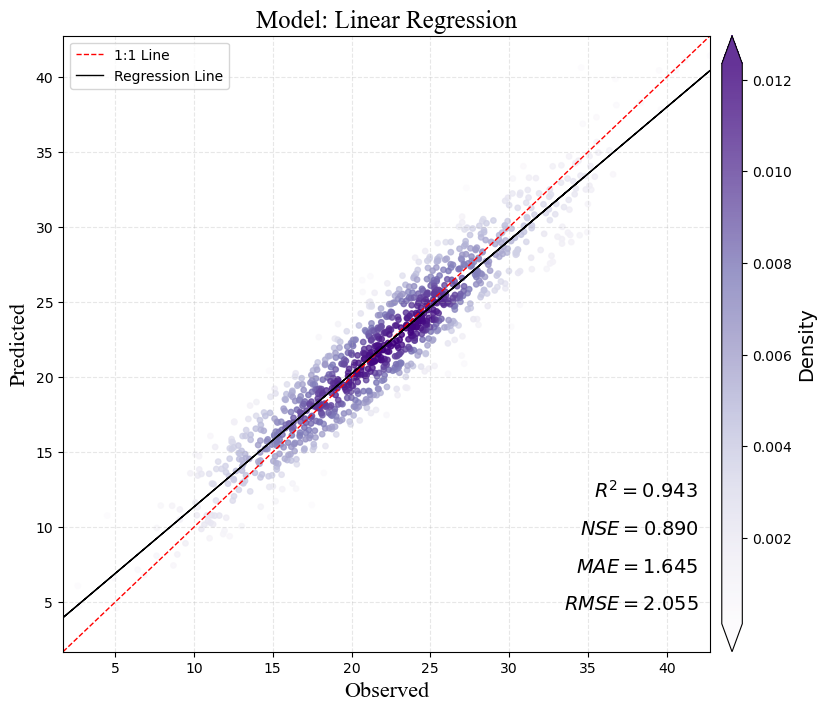

In [5]:
plot_(y_test, y_pred, title='Linear Regression', cmap='Purples')